# Foreign Aid & the World's Least Developed Countries (LDCs)
------
**Carl Smith**
* This notebook contains the data wrangling and cleaning required for this analysis. The wrangled and cleaned data will then be saved and exported for use in the *2-EDA* workbook.   

### Table of Contents  <a id='top'></a>
<ul>
<li><a href="#sources">Data Sources</a></li>
<li><a href="#analysis">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#export">Save & Export Data</a></li>
</ul>

<a id='sources'></a>
### Data Sources  <a href="#top" style="font-size:12px">(back to top)</a>
-----

* Gapminder Data, [link to data](https://www.gapminder.org/data/)
    - Foreign Aid Received per capita (current USD&#36;)
    - Human Devlopment Index (HDI)
    - Gini Coefficient
    - Total Fertility Rate
* United Nations, Human Development Reports
    - Supplemental HDI data, [link to data](http://hdr.undp.org/en/indicators/137506)

<a id='analysis'></a>
### Data Wrangling  <a href="#top" style="font-size:12px">(back to top)</a>
------

> This section will contain all of the wrangling and cleaning of the raw data sources, located in the repository path "data\raw". Cleaned data will be saved in "data\processed", and then used for EDA.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

> First let's take a look at the data for foreign aid received per capita, HDI, Gini, and fertility rates.

In [69]:
# Aid received per capita data

df_aid_received = pd.read_csv('../data/raw/aid_received_per_capita.csv')
df_aid_received.set_index('country', inplace=True)
df_aid_received

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.91000,3.78000,1.81,3.84000,4.74,5.420,5.0000,3.9500,2.75000,2.500,...,215.00,214.00,224.00,214.00,160.00,148.00,124.00,115.000,105.00,102.00
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122.00,125.00,131.00,120.00,93.30,97.30,116.00,59.500,58.50,120.00
Algeria,32.10000,38.60000,34.20,23.70000,18.60,11.700,9.8400,8.1100,8.75000,9.330,...,8.56,5.59,5.27,3.94,5.33,4.13,1.79,3.560,4.22,3.41
Angola,-0.00917,4.26000,NaN,0.00528,NaN,0.192,0.4950,3.1500,0.00173,-0.019,...,10.60,10.10,7.97,9.70,11.00,8.74,13.60,7.160,7.49,5.18
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.10,223.00,173.00,23.10,17.40,27.50,15.90,0.635,104.00,174.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.09830,1.03000,9.14,4.85000,-5.73,1.460,2.8600,2.4600,1.72000,1.060,...,2.11,1.87,1.70,1.73,1.27,1.44,1.22,1.460,2.96,5.10
Vietnam,5.87000,4.96000,5.08,6.35000,6.66,8.300,13.3000,11.5000,10.90000,11.000,...,38.20,31.50,37.50,45.80,45.00,46.00,34.20,31.000,25.40,17.10
Yemen,2.76000,2.76000,3.30,3.88000,4.14,5.510,6.6300,4.2500,1.03000,0.781,...,24.80,28.80,20.10,29.10,41.30,45.10,67.10,84.700,116.00,280.00


In [70]:
df_aid_received.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, Afghanistan to Zimbabwe
Data columns (total 59 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1960    105 non-null    float64
 1   1961    112 non-null    float64
 2   1962    105 non-null    float64
 3   1963    111 non-null    float64
 4   1964    108 non-null    float64
 5   1965    109 non-null    float64
 6   1966    117 non-null    float64
 7   1967    118 non-null    float64
 8   1968    114 non-null    float64
 9   1969    116 non-null    float64
 10  1970    114 non-null    float64
 11  1971    117 non-null    float64
 12  1972    116 non-null    float64
 13  1973    124 non-null    float64
 14  1974    125 non-null    float64
 15  1975    129 non-null    float64
 16  1976    128 non-null    float64
 17  1977    129 non-null    float64
 18  1978    130 non-null    float64
 19  1979    131 non-null    float64
 20  1980    131 non-null    float64
 21  1981    131 non-null    float

In [71]:
df_aid_received.isna().sum().sum()

1455

In [72]:
df_aid_received.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,105.000000,112.000000,105.000000,111.000000,108.000000,109.000000,117.000000,118.000000,114.000000,116.000000,...,143.000000,143.000000,140.000000,139.000000,139.000000,138.000000,138.000000,138.000000,138.000000,134.000000
mean,6.064282,7.190350,7.809632,7.306213,7.605972,8.953580,9.817464,9.312405,9.848829,9.377332,...,141.438972,146.626580,177.454650,162.486326,166.420770,148.225478,148.097784,119.253964,143.918728,170.296724
std,12.840747,12.613342,13.236907,11.868944,10.940492,11.762366,12.289175,12.886731,12.993918,12.987084,...,315.349430,312.793487,475.053594,403.945805,399.507039,358.391656,453.349193,268.833656,319.707144,491.984870
min,-0.962000,-1.620000,-7.350000,-2.670000,-5.730000,-2.710000,-2.750000,-2.490000,0.001730,-0.019000,...,-0.464000,-10.300000,-1.990000,-1.940000,-7.520000,-49.500000,-0.437000,-2.350000,-26.300000,-11.900000
25%,0.199000,0.907500,1.370000,1.275000,1.757500,1.630000,2.630000,2.152500,1.885000,1.642500,...,21.200000,17.650000,20.525000,16.750000,19.850000,22.800000,22.250000,18.125000,20.275000,22.725000
50%,1.710000,3.105000,3.300000,3.280000,4.170000,4.970000,5.640000,4.490000,5.125000,4.985000,...,55.600000,62.300000,60.950000,60.000000,61.200000,52.400000,49.750000,47.200000,57.550000,54.900000
75%,5.000000,6.292500,7.800000,7.960000,8.660000,9.460000,11.600000,9.797500,10.425000,9.822500,...,113.500000,126.500000,130.250000,131.000000,113.500000,107.750000,101.700000,94.825000,106.500000,115.000000
max,94.600000,94.200000,80.900000,78.700000,68.500000,58.800000,60.700000,74.200000,69.100000,70.200000,...,2360.000000,2780.000000,3730.000000,3470.000000,2660.000000,3130.000000,4470.000000,2180.000000,2330.000000,4710.000000


> Looks like there are some missing values we will need to deal with. Everything else looks ok for now.

In [73]:
# HDI data

df_hdi = pd.read_csv('../data/raw/hdi.csv')
df_hdi.set_index('country', inplace=True)    
df_hdi

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,0.338,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,0.656,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,0.636,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.382,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.634,0.644,0.650,0.653,0.654,0.658,0.660,0.664,0.667,0.670,...,0.728,0.745,0.754,0.754,0.756,0.767,0.770,0.771,0.769,0.767
Vietnam,0.477,0.486,0.498,0.508,0.519,0.531,0.542,0.542,0.562,0.569,...,0.625,0.633,0.641,0.647,0.655,0.662,0.668,0.675,0.678,0.683
Yemen,0.405,0.408,0.412,0.414,0.418,0.421,0.424,0.428,0.432,0.436,...,0.477,0.480,0.483,0.488,0.493,0.494,0.498,0.500,0.499,0.482


In [74]:
df_hdi.isna().sum().sum()

540

In [75]:
df_hdi.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,143.000000,143.000000,143.000000,143.000000,143.000000,147.000000,147.000000,147.000000,147.000000,150.000000,...,181.000000,181.000000,181.000000,181.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.592552,0.594741,0.597070,0.601063,0.605420,0.608612,0.613946,0.619259,0.624435,0.624560,...,0.657337,0.664083,0.669862,0.673591,0.678551,0.683471,0.688460,0.692337,0.695706,0.697695
std,0.166281,0.166808,0.167563,0.168605,0.170327,0.169428,0.169412,0.169355,0.169905,0.171892,...,0.165672,0.164153,0.162393,0.159554,0.157665,0.156405,0.155093,0.155065,0.154876,0.154739
min,0.209000,0.212000,0.206000,0.203000,0.194000,0.230000,0.237000,0.240000,0.249000,0.253000,...,0.293000,0.298000,0.307000,0.312000,0.323000,0.331000,0.341000,0.345000,0.347000,0.352000
25%,0.475000,0.477500,0.477000,0.476500,0.480000,0.478000,0.476500,0.477500,0.482000,0.464250,...,0.509000,0.518000,0.523000,0.535000,0.544000,0.554000,0.564000,0.570000,0.570000,0.576500
50%,0.620000,0.626000,0.622000,0.628000,0.632000,0.634000,0.642000,0.647000,0.650000,0.650500,...,0.696000,0.699000,0.704000,0.707000,0.711000,0.714000,0.720000,0.723000,0.724000,0.727000
75%,0.722000,0.725000,0.719000,0.724000,0.732500,0.739500,0.745500,0.751500,0.760000,0.763250,...,0.787000,0.787000,0.791000,0.797000,0.797500,0.797000,0.799000,0.803000,0.804500,0.805500
max,0.866000,0.867000,0.871000,0.874000,0.884000,0.885000,0.888000,0.895000,0.906000,0.911000,...,0.934000,0.936000,0.936000,0.936000,0.939000,0.941000,0.942000,0.945000,0.948000,0.949000


> Looks like the HDI raw data is missing data for 2016, 2017, and 2018. Ideally, I would like to include this data in my analysis, so I will try to find this data from another source and append it to this dataframe.

In [76]:
# Gini coefficient data

df_gini = pd.read_csv('../data/raw/gini.csv')
df_gini.set_index('country', inplace=True)     
df_gini

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
Albania,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,38.9,...,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
Algeria,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,56.2,...,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6
Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
Angola,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,57.2,...,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,62.8,62.8,62.8,62.8,62.8,62.8,62.8,62.8,62.8,62.8,...,46.9,46.9,46.9,46.9,46.9,46.9,46.9,46.9,46.9,46.9
Vietnam,34.2,34.2,34.2,34.2,34.2,34.2,34.2,34.2,34.2,34.2,...,35.3,35.3,35.3,35.3,35.3,35.3,35.3,35.3,35.3,35.3
Yemen,50.1,50.1,50.1,50.1,50.1,50.1,50.1,50.1,50.1,50.1,...,36.7,36.7,36.7,36.7,36.7,36.7,36.7,36.7,36.7,36.7


In [77]:
df_gini.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,41.411282,...,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769,38.850769
std,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,9.499868,...,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433,7.378433
min,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,16.300000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
25%,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000,33.500000
50%,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000,39.100000
75%,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,46.650000,...,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000,42.750000
max,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,74.200000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000


> With the gini data, there are a number values that have been interpolated back to 1800, and up to 2040. Therefore, when cleaning I will attempt to minimize the use of these interpolated values so that they don't significantly affect the analysis. This shouldn't be an issue, because the dates that I will be focusing on shouldn't have many, if any, interpolated data. 

In [78]:
# Fertility data

df_fertility = pd.read_csv('../data/raw/fertility_rates.csv')
df_fertility.set_index('country', inplace=True)
df_fertility

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86
Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
Antigua and Barbuda,5.00,5.00,4.99,4.99,4.99,4.98,4.98,4.97,4.97,4.97,...,1.81,1.81,1.81,1.81,1.81,1.81,1.81,1.82,1.82,1.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,5.63,5.63,5.64,5.64,5.64,5.65,5.65,5.65,5.66,5.66,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
Vietnam,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,4.70,...,1.89,1.89,1.89,1.89,1.89,1.89,1.89,1.89,1.89,1.89
Yemen,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,...,1.68,1.68,1.69,1.69,1.69,1.69,1.70,1.70,1.70,1.70


In [79]:
df_fertility.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,6.110707,6.107663,6.111033,6.110054,6.110435,6.110217,6.105815,6.104511,6.096359,6.084457,...,1.894239,1.890870,1.888098,1.885707,1.882935,1.880380,1.878261,1.876033,1.873478,1.873478
std,0.791456,0.795118,0.789068,0.788346,0.788456,0.784976,0.790403,0.791440,0.806280,0.834796,...,0.196231,0.190281,0.184809,0.179226,0.173738,0.168261,0.163354,0.158414,0.153074,0.153074
min,4.040000,4.040000,3.910000,4.050000,3.940000,4.060000,4.070000,4.050000,4.000000,3.210000,...,1.440000,1.440000,1.450000,1.450000,1.450000,1.450000,1.450000,1.450000,1.450000,1.450000
25%,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,5.670000,...,1.770000,1.780000,1.780000,1.780000,1.780000,1.780000,1.780000,1.780000,1.780000,1.780000
50%,6.190000,6.190000,6.190000,6.190000,6.190000,6.190000,6.190000,6.180000,6.160000,6.160000,...,1.810000,1.810000,1.810000,1.810000,1.810000,1.810000,1.810000,1.810000,1.810000,1.810000
75%,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,6.717500,...,1.930000,1.930000,1.922500,1.922500,1.922500,1.920000,1.920000,1.912500,1.910000,1.910000
max,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,8.100000,...,2.630000,2.600000,2.580000,2.550000,2.530000,2.510000,2.500000,2.480000,2.460000,2.460000


> Similar to the Gini Coefficient data, fertility rates are interpolated back to 1800 and up to 2100. Again, for this analysis this shouldn't have a significant effect.

<a id='cleaning'></a>
### Data Cleaning <a href="#top" style="font-size:12px">(back to top)</a>
------

> Now that I have all raw data wrangled, I will clean it to isolate the Least Developed Countries (LDCs) and their data from 2000-2018.

In [80]:
# List of LDCs 

ldc = ['Afghanistan',
       'Angola',
       'Bangladesh',
       'Benin',
       'Bhutan',
       'Burkina Faso',
       'Burundi',
       'Cambodia',
       'Central African Republic', 
       'Chad',
       'Comoros',
       'Congo, Dem. Rep.',
       'Djibouti',
       'Eritrea',
       'Ethiopia', 
       'Gambia',
       'Guinea', 
       'Guinea-Bissau', 
       'Haiti', 
       'Kiribati', 
       'Lao', 
       'Lesotho', 
       'Liberia',
       'Madagascar',
       'Malawi', 
       'Mali', 
       'Mauritania',
       'Mozambique',
       'Myanmar',
       'Nepal',
       'Niger',
       'Rwanda',
       'Sao Tome and Principe',
       'Senegal',
       'Sierra Leone', 
       'Solomon Islands', 
       'Somalia', 
       'Sudan',
       'Tanzania', 
       'Togo',
       'Tuvalu',
       'Uganda',
       'Vanuatu',
       'Yemen',
       'Zambia']

In [81]:
len(ldc)

45

> - This [list of LDCs](https://www.un.org/development/desa/dpad/least-developed-country-category.html) was sourced from the United Nations.
> - 2 countries, South Sudan and Timor-Leste, have not been included in this list because they were not classified as a LDC until 2012 and 2003 respectively. 
> - **2021 Update**: *when this analysis was performed, Vanuatu was listed as a LDC by the United Nations. Since that time, Vanuatu has graduated from being considered a LDC.*

In [82]:
# Create dataframe for LDCs from 2000-2018.

df_ldc_aid = df_aid_received.loc[ldc, '2000':'2018']
df_ldc_aid

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,
Afghanistan,6.55,19.00,54.10,65.00,91.70,110.00,110.00,184.00,174.0,215.00,214.00,224.00,214.00,160.0,148.00,124.0,115.00,105.00,102.00
Angola,18.40,16.70,23.60,27.20,61.00,21.30,8.12,12.40,17.0,10.60,10.10,7.97,9.70,11.0,8.74,13.6,7.16,7.49,5.18
Bangladesh,7.65,7.06,6.09,9.66,10.40,9.00,7.29,9.17,12.2,7.42,8.99,9.63,14.30,17.2,15.70,16.6,16.00,23.70,18.80
Benin,35.60,39.60,30.40,40.20,50.60,43.70,48.70,56.20,73.2,75.70,74.90,71.10,52.20,66.0,58.30,41.3,46.10,60.80,49.70
Bhutan,79.70,90.50,97.40,116.00,113.00,121.00,141.00,144.00,118.0,149.00,142.00,171.00,230.00,193.0,182.00,134.0,70.00,159.00,133.00
Burkina Faso,15.50,32.70,35.80,42.70,49.70,52.00,65.10,66.10,68.1,71.60,66.90,61.10,69.50,61.2,63.90,55.1,55.20,46.50,56.20
Burundi,14.60,21.30,25.60,32.90,50.30,49.60,56.80,64.20,64.0,68.60,72.30,63.90,56.70,58.6,52.40,36.1,70.80,40.30,40.30
Cambodia,28.40,29.60,32.20,34.50,31.10,34.10,35.30,46.50,44.1,45.30,47.60,47.60,54.60,53.8,52.60,43.7,46.20,53.50,47.30
Central African Republic,20.80,20.50,15.80,13.30,27.80,22.00,32.40,42.90,60.9,55.60,59.50,60.80,51.40,45.6,137.00,108.0,112.00,111.00,141.00


In [83]:
# Any missing values or wrong dtypes?

df_ldc_aid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, Afghanistan to Zambia
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    45 non-null     float64
 1   2001    45 non-null     float64
 2   2002    45 non-null     float64
 3   2003    45 non-null     float64
 4   2004    45 non-null     float64
 5   2005    45 non-null     float64
 6   2006    45 non-null     float64
 7   2007    45 non-null     float64
 8   2008    45 non-null     float64
 9   2009    45 non-null     float64
 10  2010    45 non-null     float64
 11  2011    45 non-null     float64
 12  2012    44 non-null     float64
 13  2013    44 non-null     float64
 14  2014    44 non-null     float64
 15  2015    44 non-null     float64
 16  2016    44 non-null     float64
 17  2017    44 non-null     float64
 18  2018    43 non-null     float64
dtypes: float64(19)
memory usage: 7.0+ KB


In [84]:
df_ldc_aid[df_ldc_aid.isna().any(axis=1)]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,
Eritrea,77.70,120.00,91.40,122.0,96.9,124.0,43.2,52.9,47.5,45.7,51.2,41.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sudan,6.48,5.37,8.29,16.4,25.5,45.6,49.7,50.0,58.8,52.4,43.9,47.2,36.3,39.1,22.2,22.4,19.7,19.9,NaN


> I will go ahead and impute the mean for Eritrea and Sudan.

In [85]:
df_ldc_aid = df_ldc_aid.apply(lambda row: row.fillna(row.mean()), axis=1).round(2)
df_ldc_aid

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,
Afghanistan,6.55,19.00,54.10,65.00,91.70,110.00,110.00,184.00,174.0,215.00,214.00,224.00,214.00,160.00,148.00,124.00,115.00,105.00,102.00
Angola,18.40,16.70,23.60,27.20,61.00,21.30,8.12,12.40,17.0,10.60,10.10,7.97,9.70,11.00,8.74,13.60,7.16,7.49,5.18
Bangladesh,7.65,7.06,6.09,9.66,10.40,9.00,7.29,9.17,12.2,7.42,8.99,9.63,14.30,17.20,15.70,16.60,16.00,23.70,18.80
Benin,35.60,39.60,30.40,40.20,50.60,43.70,48.70,56.20,73.2,75.70,74.90,71.10,52.20,66.00,58.30,41.30,46.10,60.80,49.70
Bhutan,79.70,90.50,97.40,116.00,113.00,121.00,141.00,144.00,118.0,149.00,142.00,171.00,230.00,193.00,182.00,134.00,70.00,159.00,133.00
Burkina Faso,15.50,32.70,35.80,42.70,49.70,52.00,65.10,66.10,68.1,71.60,66.90,61.10,69.50,61.20,63.90,55.10,55.20,46.50,56.20
Burundi,14.60,21.30,25.60,32.90,50.30,49.60,56.80,64.20,64.0,68.60,72.30,63.90,56.70,58.60,52.40,36.10,70.80,40.30,40.30
Cambodia,28.40,29.60,32.20,34.50,31.10,34.10,35.30,46.50,44.1,45.30,47.60,47.60,54.60,53.80,52.60,43.70,46.20,53.50,47.30
Central African Republic,20.80,20.50,15.80,13.30,27.80,22.00,32.40,42.90,60.9,55.60,59.50,60.80,51.40,45.60,137.00,108.00,112.00,111.00,141.00


In [86]:
# confirm values have been imputed.

df_ldc_aid.isna().sum().sum()

0

> With missing values taken care of, I want to take a closer look at Tuvalu. At first glance, it looks like Tuvalu receives a disproportionate amount of aid compared to all other countries. I want to find out whether or not Tuvalu is an outlier, and if so, is it worth dropping from `df_ldc_aid`. I'll define an outlier using the [1.5xIQR rule](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule#:~:text=A%20commonly%20used%20rule%20says,or%20below%20the%20first%20quartile.). 
>
> First I want to quickly visualize the average aid received by each country from 2000-2018. 

In [87]:
df_ldc_aid['ldc_mean'] = df_ldc_aid.mean(axis=1).round(2)
df_ldc_aid

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,ldc_mean
country,,,,,,,,,,,,,,,,,,,,
Afghanistan,6.55,19.00,54.10,65.00,91.70,110.00,110.00,184.00,174.0,215.00,214.00,224.00,214.00,160.00,148.00,124.00,115.00,105.00,102.00,128.18
Angola,18.40,16.70,23.60,27.20,61.00,21.30,8.12,12.40,17.0,10.60,10.10,7.97,9.70,11.00,8.74,13.60,7.16,7.49,5.18,15.65
Bangladesh,7.65,7.06,6.09,9.66,10.40,9.00,7.29,9.17,12.2,7.42,8.99,9.63,14.30,17.20,15.70,16.60,16.00,23.70,18.80,11.94
Benin,35.60,39.60,30.40,40.20,50.60,43.70,48.70,56.20,73.2,75.70,74.90,71.10,52.20,66.00,58.30,41.30,46.10,60.80,49.70,53.38
Bhutan,79.70,90.50,97.40,116.00,113.00,121.00,141.00,144.00,118.0,149.00,142.00,171.00,230.00,193.00,182.00,134.00,70.00,159.00,133.00,135.98
Burkina Faso,15.50,32.70,35.80,42.70,49.70,52.00,65.10,66.10,68.1,71.60,66.90,61.10,69.50,61.20,63.90,55.10,55.20,46.50,56.20,54.47
Burundi,14.60,21.30,25.60,32.90,50.30,49.60,56.80,64.20,64.0,68.60,72.30,63.90,56.70,58.60,52.40,36.10,70.80,40.30,40.30,49.44
Cambodia,28.40,29.60,32.20,34.50,31.10,34.10,35.30,46.50,44.1,45.30,47.60,47.60,54.60,53.80,52.60,43.70,46.20,53.50,47.30,42.53
Central African Republic,20.80,20.50,15.80,13.30,27.80,22.00,32.40,42.90,60.9,55.60,59.50,60.80,51.40,45.60,137.00,108.00,112.00,111.00,141.00,59.91


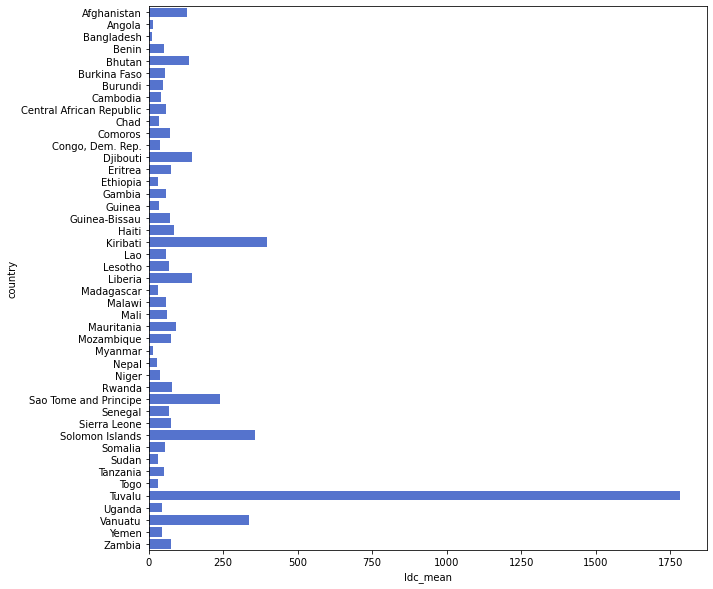

In [88]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_ldc_aid, x=df_ldc_aid.ldc_mean, y=df_ldc_aid.index, color='royalblue');

> Based on this visualization, which plots the mean for each country from 2000-2018, Tuvalu looks like an outlier. However, I'll confirm that with the 1.5xIQR Rule. This will test to see whether or not Tuvalu's mean lies outside of the following value, *Upper quartile (Q3) + 1.5 x IQR*. If it does, then I will define Tuvalu as an outlier.

In [90]:
df_ldc_aid.ldc_mean.describe()

count      45.000000
mean      123.242444
std       267.121470
min        11.940000
25%        39.650000
50%        59.320000
75%        79.820000
max      1782.530000
Name: ldc_mean, dtype: float64

In [91]:
# Find interquartile range, IQR

q1_test = df_ldc_aid.ldc_mean.quantile(0.25)
q3_test = df_ldc_aid.ldc_mean.quantile(0.75)
IQR = q3_test - q1_test
IQR

40.169999999999995

In [92]:
# Test Tuvalu against 1.5xIQR rule.

tuvalu_mean = df_ldc_aid.loc['Tuvalu', 'ldc_mean']
rule = q3_test + 1.5 * IQR

print(tuvalu_mean,',', rule)
print(f'Is Tuvalu an outlier? -> {tuvalu_mean > rule}')

1782.53 , 140.075
Is Tuvalu an outlier? -> True


> Tuvalu can now be defined as an outlier. Tuvalu's mean, *1,782.53*, lies outside the upper limit of the rule, *140.08*. Therefore, I will go ahead and drop Tuvalu from `df_ldc_aid`.

In [93]:
# drop Tuvalu

df_ldc_aid.drop('Tuvalu', inplace=True)
df_ldc_aid

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,ldc_mean
country,,,,,,,,,,,,,,,,,,,,
Afghanistan,6.55,19.00,54.10,65.00,91.70,110.00,110.00,184.00,174.0,215.00,214.00,224.00,214.00,160.00,148.00,124.00,115.00,105.00,102.00,128.18
Angola,18.40,16.70,23.60,27.20,61.00,21.30,8.12,12.40,17.0,10.60,10.10,7.97,9.70,11.00,8.74,13.60,7.16,7.49,5.18,15.65
Bangladesh,7.65,7.06,6.09,9.66,10.40,9.00,7.29,9.17,12.2,7.42,8.99,9.63,14.30,17.20,15.70,16.60,16.00,23.70,18.80,11.94
Benin,35.60,39.60,30.40,40.20,50.60,43.70,48.70,56.20,73.2,75.70,74.90,71.10,52.20,66.00,58.30,41.30,46.10,60.80,49.70,53.38
Bhutan,79.70,90.50,97.40,116.00,113.00,121.00,141.00,144.00,118.0,149.00,142.00,171.00,230.00,193.00,182.00,134.00,70.00,159.00,133.00,135.98
Burkina Faso,15.50,32.70,35.80,42.70,49.70,52.00,65.10,66.10,68.1,71.60,66.90,61.10,69.50,61.20,63.90,55.10,55.20,46.50,56.20,54.47
Burundi,14.60,21.30,25.60,32.90,50.30,49.60,56.80,64.20,64.0,68.60,72.30,63.90,56.70,58.60,52.40,36.10,70.80,40.30,40.30,49.44
Cambodia,28.40,29.60,32.20,34.50,31.10,34.10,35.30,46.50,44.1,45.30,47.60,47.60,54.60,53.80,52.60,43.70,46.20,53.50,47.30,42.53
Central African Republic,20.80,20.50,15.80,13.30,27.80,22.00,32.40,42.90,60.9,55.60,59.50,60.80,51.40,45.60,137.00,108.00,112.00,111.00,141.00,59.91


In [94]:
# confirm Tuvalu was dropped

len(df_ldc_aid.index)

44

>Now, in order to answer my second research question, I am going to seperate the LDC countries into two groups. One group will consist of countries who receive the most amount of foreign aid per capita on average, and the other will be those countries who receive the least on average. I will define these two groups by finding which countries fall in the upper quartile of aid received, and which countries fall in the lower quartile of aid received. By doing this I will be able to compare these two groups to see how their economic indicators are affected based on the amount of foreign aid they receive. 

In [95]:
# first let's get updated descriptive stats since Tuvalu was dropped.

df_ldc_aid.ldc_mean.describe()

count     44.000000
mean      85.531364
std       86.771819
min       11.940000
25%       38.980000
50%       58.545000
75%       77.082500
max      395.630000
Name: ldc_mean, dtype: float64

In [96]:
# lower and upper quartiles

q1 = df_ldc_aid.ldc_mean.quantile(0.25)
q3 = df_ldc_aid.ldc_mean.quantile(0.75)
q1, q3

(38.98, 77.0825)

In [100]:
ldc_aid_lower = df_ldc_aid.query('ldc_mean <= @q1')
ldc_aid_lower

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,ldc_mean
country,,,,,,,,,,,,,,,,,,,,
Angola,18.40,16.70,23.60,27.20,61.00,21.30,8.12,12.40,17.0,10.60,10.10,7.97,9.70,11.0,8.74,13.6,7.16,7.49,5.18,15.65
Bangladesh,7.65,7.06,6.09,9.66,10.40,9.00,7.29,9.17,12.2,7.42,8.99,9.63,14.30,17.2,15.70,16.6,16.00,23.70,18.80,11.94
Chad,15.70,21.70,25.40,26.90,34.10,38.30,27.80,34.00,39.5,48.30,41.00,37.00,37.20,34.7,28.70,43.0,42.90,43.10,56.60,35.57
"Congo, Dem. Rep.",3.79,5.09,23.60,105.00,36.20,34.30,38.80,23.10,29.2,37.80,54.00,82.80,41.20,36.2,32.50,34.1,26.70,28.20,29.90,36.97
Ethiopia,10.40,16.20,18.90,22.50,24.70,25.30,25.90,32.30,40.0,44.90,39.40,38.80,35.00,40.7,36.50,32.1,39.40,38.80,45.10,31.94
Guinea,18.60,34.40,29.60,28.60,30.80,21.20,18.60,27.10,36.1,21.80,21.70,19.40,59.50,42.9,50.50,47.1,48.30,39.10,47.60,33.84
Madagascar,20.60,23.00,22.30,31.60,70.40,50.00,41.50,46.10,42.4,21.10,22.60,20.60,16.50,21.7,24.90,28.0,25.00,30.50,26.30,30.79
Myanmar,2.26,2.66,2.50,2.60,2.54,2.96,2.96,3.95,10.7,7.08,7.01,7.45,9.81,75.9,26.50,22.2,29.00,28.90,31.40,14.65
Nepal,13.00,14.30,13.50,18.10,16.90,15.80,17.40,21.10,23.0,26.40,28.40,27.70,28.50,32.4,32.80,45.3,39.00,45.90,51.60,26.90


In [101]:
ldc_aid_upper = df_ldc_aid.query('ldc_mean >= @q3')
ldc_aid_upper

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,ldc_mean
country,,,,,,,,,,,,,,,,,,,,
Afghanistan,6.55,19.0,54.1,65.0,91.7,110.0,110.0,184.0,174.0,215.0,214.0,224.0,214.0,160.0,148.0,124.0,115.0,105.0,102.0,128.18
Bhutan,79.70,90.5,97.4,116.0,113.0,121.0,141.0,144.0,118.0,149.0,142.0,171.0,230.0,193.0,182.0,134.0,70.0,159.0,133.0,135.98
Djibouti,101.00,81.0,99.2,104.0,83.4,94.7,145.0,140.0,172.0,200.0,157.0,166.0,171.0,169.0,185.0,190.0,199.0,151.0,185.0,147.02
Haiti,21.50,19.8,17.4,21.0,31.0,39.9,56.9,65.6,85.5,101.0,290.0,149.0,124.0,111.0,103.0,97.8,98.9,89.3,89.2,84.83
Kiribati,201.00,129.0,230.0,183.0,161.0,289.0,271.0,285.0,273.0,249.0,231.0,616.0,617.0,602.0,737.0,586.0,541.0,676.0,640.0,395.63
Liberia,23.70,13.0,18.2,34.7,68.1,69.0,78.4,324.0,347.0,136.0,364.0,190.0,137.0,126.0,172.0,245.0,179.0,134.0,118.0,146.16
Mauritania,85.00,105.0,131.0,91.3,66.3,62.4,69.5,109.0,138.0,111.0,107.0,106.0,111.0,77.2,66.3,81.4,73.8,67.9,102.0,92.69
Rwanda,40.50,37.0,42.7,39.3,56.6,64.8,66.9,84.1,98.2,95.5,103.0,123.0,83.3,100.0,93.4,95.7,98.6,103.0,91.0,79.82
Sao Tome and Principe,246.00,264.0,177.0,252.0,219.0,208.0,143.0,307.0,276.0,173.0,278.0,398.0,269.0,280.0,211.0,245.0,231.0,194.0,210.0,241.11


> The two dataframes above, `ldc_aid_lower` and `ldc_aid_upper`, can now be saved and exported for use during exploratory analysis in the *2-EDA* notebook.

In [102]:
# Save these country in lists to use with the other economic indicators: HDI, Gini, and Fertility

countries_lower = ldc_aid_lower.index.tolist()
countries_upper = ldc_aid_upper.index.tolist()
countries_lower, countries_upper

(['Angola',
  'Bangladesh',
  'Chad',
  'Congo, Dem. Rep.',
  'Ethiopia',
  'Guinea',
  'Madagascar',
  'Myanmar',
  'Nepal',
  'Sudan',
  'Togo'],
 ['Afghanistan',
  'Bhutan',
  'Djibouti',
  'Haiti',
  'Kiribati',
  'Liberia',
  'Mauritania',
  'Rwanda',
  'Sao Tome and Principe',
  'Solomon Islands',
  'Vanuatu'])

> Now I'll move onto creating dataframes for each economic indicator, first HDI.

In [104]:
# HDI of lower quartile countries.

ldc_hdi_lower = df_hdi.loc[countries_lower, '2000':]
ldc_hdi_lower

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,
Angola,0.391,0.401,0.406,0.415,0.426,0.439,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533
Bangladesh,0.468,0.476,0.484,0.491,0.499,0.506,0.513,0.520,0.523,0.535,0.545,0.557,0.565,0.570,0.575,0.579
Chad,0.300,0.303,0.284,0.301,0.306,0.303,0.306,0.338,0.343,0.360,0.370,0.381,0.387,0.390,0.394,0.396
"Congo, Dem. Rep.",0.331,0.332,0.339,0.347,0.355,0.364,0.370,0.377,0.389,0.395,0.398,0.407,0.412,0.419,0.425,0.435
Ethiopia,0.283,0.298,0.306,0.310,0.325,0.346,0.362,0.378,0.393,0.401,0.411,0.422,0.427,0.435,0.441,0.448
Guinea,0.322,0.329,0.338,0.325,0.346,0.356,0.364,0.371,0.376,0.380,0.385,0.396,0.406,0.412,0.414,0.414
Madagascar,0.456,0.462,0.457,0.466,0.473,0.478,0.483,0.491,0.500,0.503,0.504,0.506,0.508,0.509,0.511,0.512
Myanmar,0.427,0.435,0.445,0.455,0.465,0.474,0.484,0.493,0.504,0.515,0.526,0.533,0.540,0.547,0.552,0.556
Nepal,0.446,0.447,0.457,0.463,0.469,0.476,0.486,0.492,0.502,0.515,0.529,0.538,0.545,0.551,0.555,0.558


> Looks good.

In [242]:
# HDI of upper quartile countries.

ldc_hdi_upper = df_hdi.loc[countries_upper, '2000':]
ldc_hdi_upper

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,
Afghanistan,0.340,0.341,0.373,0.381,0.396,0.405,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
Bhutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.572,0.581,0.589,0.596,0.604,0.607
Djibouti,0.363,0.372,0.378,0.388,0.396,0.405,0.416,0.427,0.436,0.441,0.451,0.460,0.464,0.467,0.470,0.473
Haiti,0.443,0.444,0.447,0.450,0.452,0.455,0.458,0.462,0.466,0.470,0.470,0.477,0.483,0.487,0.490,0.493
Kiribati,NaN,NaN,NaN,NaN,NaN,0.576,0.574,0.572,0.576,0.584,0.585,0.581,0.589,0.597,0.586,0.588
Liberia,0.386,0.376,0.373,0.335,0.372,0.377,0.383,0.394,0.400,0.403,0.406,0.416,0.419,0.426,0.427,0.427
Mauritania,0.444,0.446,0.447,0.451,0.461,0.466,0.475,0.475,0.476,0.484,0.487,0.491,0.501,0.509,0.513,0.513
Rwanda,0.332,0.343,0.359,0.371,0.388,0.404,0.424,0.438,0.447,0.454,0.464,0.475,0.485,0.488,0.493,0.498
Sao Tome and Principe,0.497,0.501,0.504,0.509,0.514,0.521,0.527,0.531,0.533,0.542,0.546,0.553,0.559,0.562,0.565,0.574


> Alright, so there a number of missing values for Bhutan, Kiribati, and Vanuatu. I was able to find some of these missing data points from the [United Nations Development Programme Reports](http://hdr.undp.org/en/indicators/137506), including:
>    - Bhutan, 2005-2009
>    - Kiribati, 2000-2004

In [243]:
# Supplemental HDI data

hdi_supp = pd.read_csv('../data/raw/hdi_supplemental.csv', index_col='Country')
hdi_supp

,HDI Rank,1990,Unnamed: 3,1991,Unnamed: 5,1992,Unnamed: 7,1993,Unnamed: 9,1994,...,2015,Unnamed: 53,2016,Unnamed: 55,2017,Unnamed: 57,2018,Unnamed: 59,2019,Unnamed: 61
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,169,0.302,NaN,0.307,NaN,0.316,NaN,0.312,NaN,0.307,...,0.500,NaN,0.502,NaN,0.506,NaN,0.509,NaN,0.511,NaN
Albania,69,0.650,NaN,0.631,NaN,0.615,NaN,0.618,NaN,0.624,...,0.788,NaN,0.788,NaN,0.790,NaN,0.792,NaN,0.795,NaN
Algeria,91,0.572,NaN,0.576,NaN,0.582,NaN,0.586,NaN,0.590,...,0.740,NaN,0.743,NaN,0.745,NaN,0.746,NaN,0.748,NaN
Andorra,36,..,NaN,..,NaN,..,NaN,..,NaN,..,...,0.862,NaN,0.866,NaN,0.863,NaN,0.867,NaN,0.868,NaN
Angola,148,..,NaN,..,NaN,..,NaN,..,NaN,..,...,0.572,NaN,0.578,NaN,0.582,NaN,0.582,NaN,0.581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Least Developed Countries,,0.350,NaN,0.353,NaN,0.354,NaN,0.358,NaN,0.358,...,0.516,NaN,0.520,NaN,0.525,NaN,0.528,NaN,0.538,NaN
Small Island Developing States,,0.595,NaN,0.598,NaN,0.603,NaN,0.608,NaN,0.612,...,0.717,NaN,0.719,NaN,0.722,NaN,0.723,NaN,0.728,NaN
Organization for Economic Co-operation and Development,,0.785,NaN,0.790,NaN,0.788,NaN,0.800,NaN,0.807,...,0.889,NaN,0.892,NaN,0.894,NaN,0.895,NaN,0.900,NaN


In [244]:
# drop all columns with null values

hdi_supp.dropna(axis=1, how='all', inplace=True)
hdi_supp

,HDI Rank,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,169,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,0.344,...,0.472,0.477,0.489,0.496,0.500,0.500,0.502,0.506,0.509,0.511
Albania,69,0.650,0.631,0.615,0.618,0.624,0.637,0.646,0.645,0.655,...,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
Algeria,91,0.572,0.576,0.582,0.586,0.590,0.595,0.602,0.611,0.621,...,0.721,0.728,0.728,0.729,0.736,0.740,0.743,0.745,0.746,0.748
Andorra,36,..,..,..,..,..,..,..,..,..,...,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
Angola,148,..,..,..,..,..,..,..,..,..,...,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Least Developed Countries,,0.350,0.353,0.354,0.358,0.358,0.366,0.374,0.381,0.388,...,0.485,0.493,0.499,0.504,0.510,0.516,0.520,0.525,0.528,0.538
Small Island Developing States,,0.595,0.598,0.603,0.608,0.612,0.618,0.624,0.629,0.632,...,0.702,0.706,0.704,0.708,0.712,0.717,0.719,0.722,0.723,0.728
Organization for Economic Co-operation and Development,,0.785,0.790,0.788,0.800,0.807,0.812,0.817,0.817,0.826,...,0.873,0.877,0.879,0.883,0.886,0.889,0.892,0.894,0.895,0.900


In [247]:
# Insert data points for Bhutan and Kiribati

ldc_hdi_upper.loc['Bhutan', '2005':'2009'] = hdi_supp.loc[' Bhutan','2005':'2009']
ldc_hdi_upper.loc['Kiribati', '2000':'2004'] = hdi_supp.loc[' Kiribati','2000':'2004']

In [248]:
ldc_hdi_upper

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,
Afghanistan,0.34,0.341,0.373,0.381,0.396,0.405,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
Bhutan,NaN,NaN,NaN,NaN,NaN,0.520,0.526,0.542,0.551,0.561,0.572,0.581,0.589,0.596,0.604,0.607
Djibouti,0.363,0.372,0.378,0.388,0.396,0.405,0.416,0.427,0.436,0.441,0.451,0.460,0.464,0.467,0.470,0.473
Haiti,0.443,0.444,0.447,0.45,0.452,0.455,0.458,0.462,0.466,0.47,0.470,0.477,0.483,0.487,0.490,0.493
Kiribati,0.553,0.569,0.569,0.574,0.572,0.576,0.574,0.572,0.576,0.584,0.585,0.581,0.589,0.597,0.586,0.588
Liberia,0.386,0.376,0.373,0.335,0.372,0.377,0.383,0.394,0.4,0.403,0.406,0.416,0.419,0.426,0.427,0.427
Mauritania,0.444,0.446,0.447,0.451,0.461,0.466,0.475,0.475,0.476,0.484,0.487,0.491,0.501,0.509,0.513,0.513
Rwanda,0.332,0.343,0.359,0.371,0.388,0.404,0.424,0.438,0.447,0.454,0.464,0.475,0.485,0.488,0.493,0.498
Sao Tome and Principe,0.497,0.501,0.504,0.509,0.514,0.521,0.527,0.531,0.533,0.542,0.546,0.553,0.559,0.562,0.565,0.574


> Backfill data for Bhutan and Vanuatu.

<a id='export'></a>
### Save & Export Data <a href="#top" style="font-size:12px">(back to top)</a>
----

In [ ]:
# export cleaned dataframe of LDCs
# interim
df_ldc_aid

In [ ]:
# processed data
ldc_aid_lower
ldc_aid_upper